<a href="https://colab.research.google.com/github/Berto39/Estudo-de-Caso---Aterramento/blob/main/ia_cnn_pedro_lucas_berto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


<ipython-input-1-7f164a86cf12>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


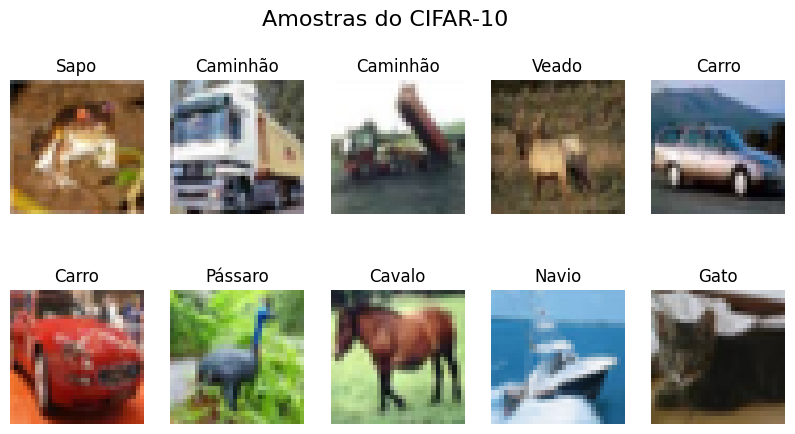

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 46ms/step - accuracy: 0.3724 - loss: 1.7133 - val_accuracy: 0.5743 - val_loss: 1.1995
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.5982 - loss: 1.1405 - val_accuracy: 0.6315 - val_loss: 1.0477
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.6592 - loss: 0.9720 - val_accuracy: 0.6634 - val_loss: 0.9703
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.6977 - loss: 0.8713 - val_accuracy: 0.6537 - val_loss: 0.9983
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.7216 - loss: 0.7855 - val_accuracy: 0.6874 - val_loss: 0.9078
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7484 - loss: 0.7169 - val_accuracy: 0.6968 - val_loss: 0.8776
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.7619 - loss: 0.6752 - val_accuracy: 0.7133 - val_loss: 0.8551
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 44ms/step - accuracy: 0.7821 -

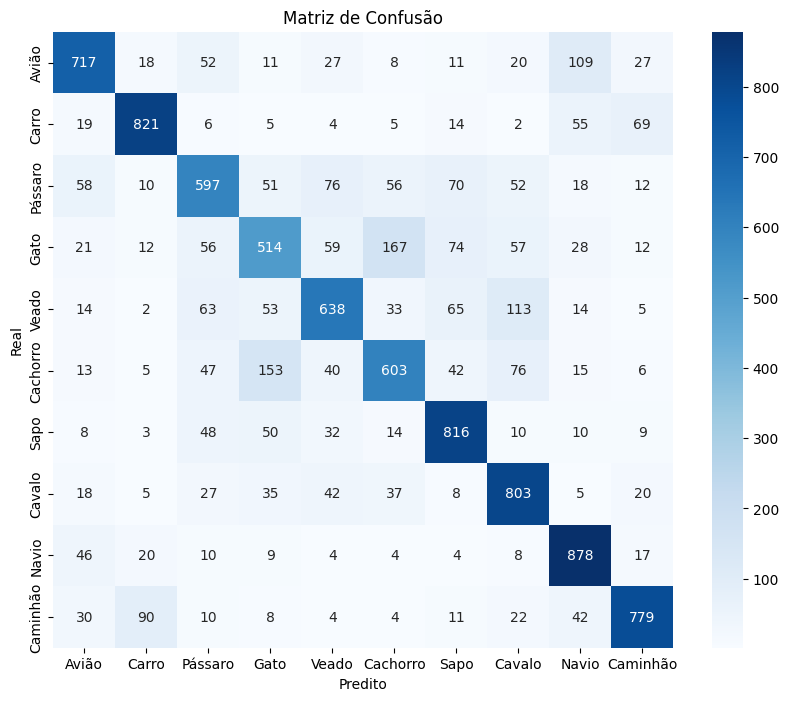

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

<ipython-input-1-7f164a86cf12>:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true = class_names[int(y_test[idx])]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


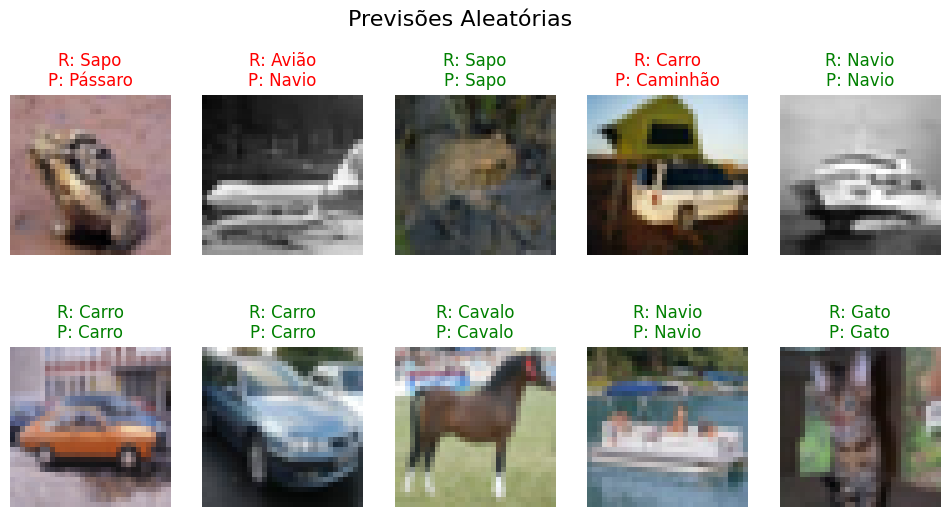

In [1]:
# 1. Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 2. Carregar a base CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizar

# 3. Classes
class_names = ['Avião', 'Carro', 'Pássaro', 'Gato', 'Veado',
               'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']

# 4. Visualizar algumas imagens
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.suptitle("Amostras do CIFAR-10", fontsize=16)
plt.show()

# 5. Construir a CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 6. Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 7. Treinar a CNN
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# 8. Avaliar a CNN
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nAcurácia no teste:', round(test_acc * 100, 2), '%')

# 9. Matriz de confusão
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test.flatten(), y_pred_classes),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# 10. Visualizar previsões
plt.figure(figsize=(12, 6))
for i in range(10):
    idx = np.random.randint(len(x_test))
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    true = class_names[int(y_test[idx])]
    pred = class_names[int(np.argmax(model.predict(x_test[idx][None, ...])))]

    color = 'green' if true == pred else 'red'
    plt.title(f'R: {true}\nP: {pred}', color=color)
    plt.axis('off')
plt.suptitle("Previsões Aleatórias", fontsize=16)
plt.show()


🚀 Iniciando projeto de Classificação de Imagens com CNN
📊 Dataset: CIFAR-10
--------------------------------------------------
📥 Carregando dataset CIFAR-10...
✅ Dados carregados com sucesso!
   📏 Treino: 50000 imagens
   📏 Teste: 10000 imagens
   🖼️  Dimensão das imagens: 32x32x3

🔄 Normalizando pixels...
✅ Normalização concluída!

🏷️  Classes do dataset: 10 categorias
   0: Avião
   1: Carro
   2: Pássaro
   3: Gato
   4: Veado
   5: Cachorro
   6: Sapo
   7: Cavalo
   8: Navio
   9: Caminhão

🔍 Visualizando amostras do dataset...


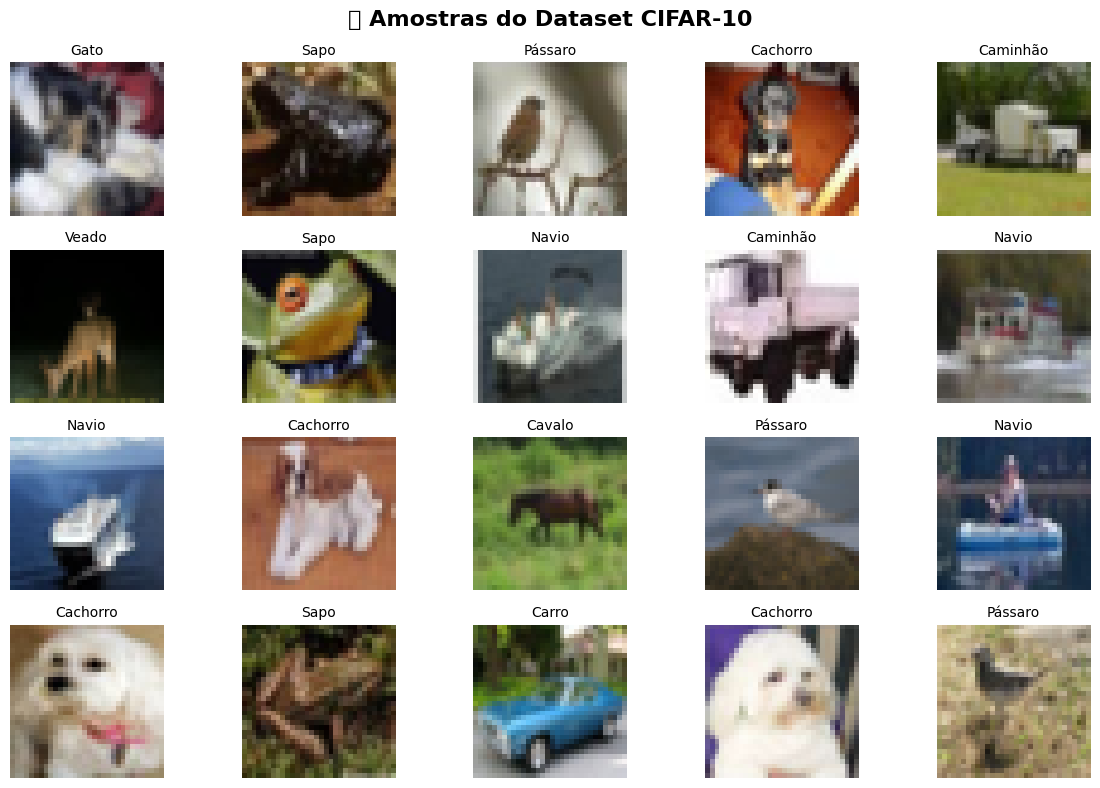


📊 Analisando distribuição das classes...


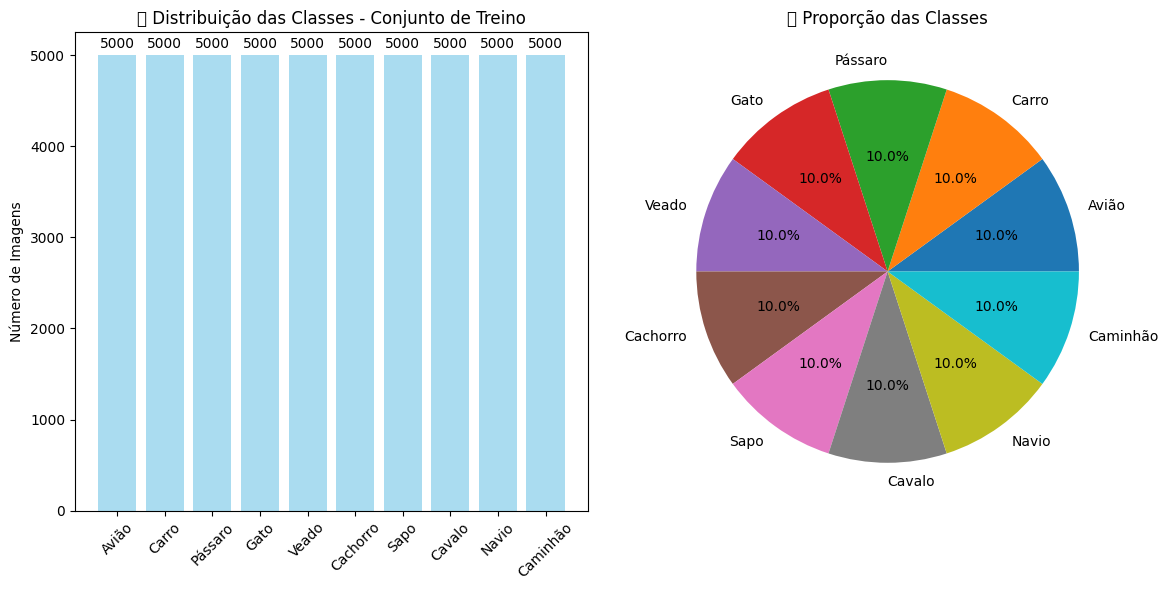

✅ Dataset balanceado: 5000 imagens por classe

🏗️  Construindo a arquitetura da CNN...
   🔵 Bloco 1: Conv2D(32) + MaxPooling
   🔵 Bloco 2: Conv2D(64) + MaxPooling
   🔵 Bloco 3: Conv2D(64)
   🟡 Flatten + Dense Layers

📋 Resumo da Arquitetura:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_1 (MaxPooling2D)        │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_2 (MaxPooling2D)        │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)


⚙️  Compilando o modelo...
✅ Modelo compilado com sucesso!
   🎯 Otimizador: Adam
   📉 Função de Perda: Sparse Categorical Crossentropy
   📊 Métrica: Accuracy

🏋️  Iniciando treinamento...
   Época 1/10 - Acurácia: 0.4032 - Perda: 1.6160 - Val_Acc: 0.4903
   Época 2/10 - Acurácia: 0.5276 - Perda: 1.3081 - Val_Acc: 0.5808
   Época 3/10 - Acurácia: 0.5775 - Perda: 1.1812 - Val_Acc: 0.6108
   Época 4/10 - Acurácia: 0.6127 - Perda: 1.0963 - Val_Acc: 0.6323
   Época 5/10 - Acurácia: 0.6330 - Perda: 1.0346 - Val_Acc: 0.6548
   Época 6/10 - Acurácia: 0.6491 - Perda: 0.9901 - Val_Acc: 0.6672
   Época 7/10 - Acurácia: 0.6658 - Perda: 0.9439 - Val_Acc: 0.6866
   Época 8/10 - Acurácia: 0.6781 - Perda: 0.9046 - Val_Acc: 0.6831
   Época 9/10 - Acurácia: 0.6865 - Perda: 0.8849 - Val_Acc: 0.6826
   Época 10/10 - Acurácia: 0.6939 - Perda: 0.8656 - Val_Acc: 0.7072
✅ Treinamento concluído!

📊 Visualizando histórico de treinamento...


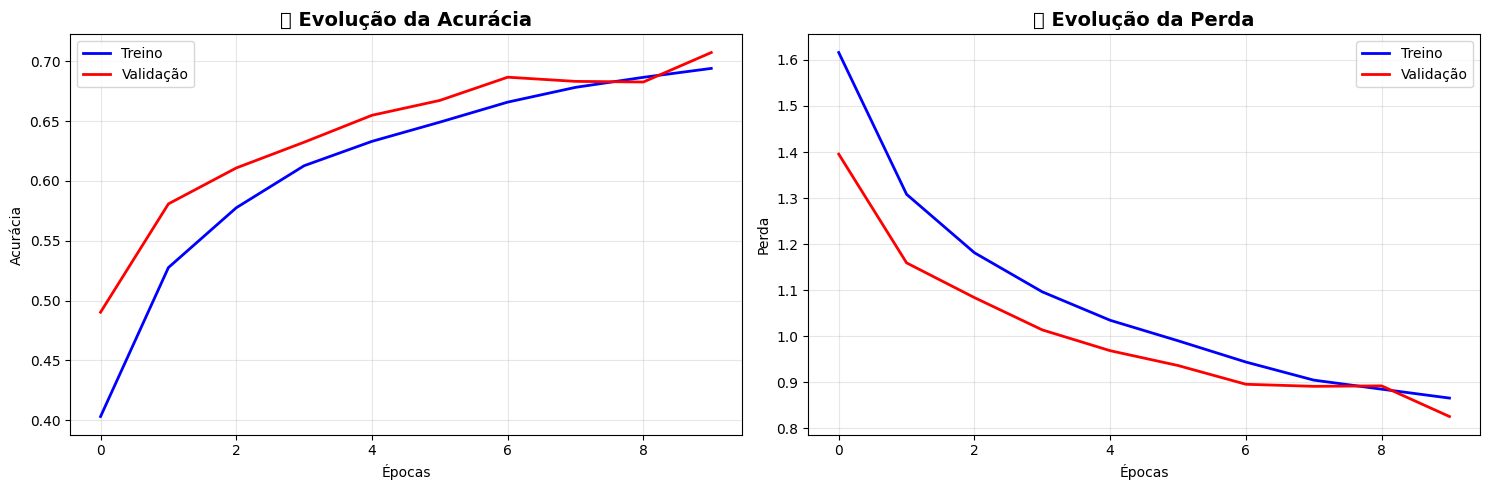


🎯 Avaliando performance no conjunto de teste...
📊 RESULTADOS FINAIS:
   🎯 Acurácia no Teste: 70.72%
   📉 Perda no Teste: 0.8255

🔍 Gerando matriz de confusão...


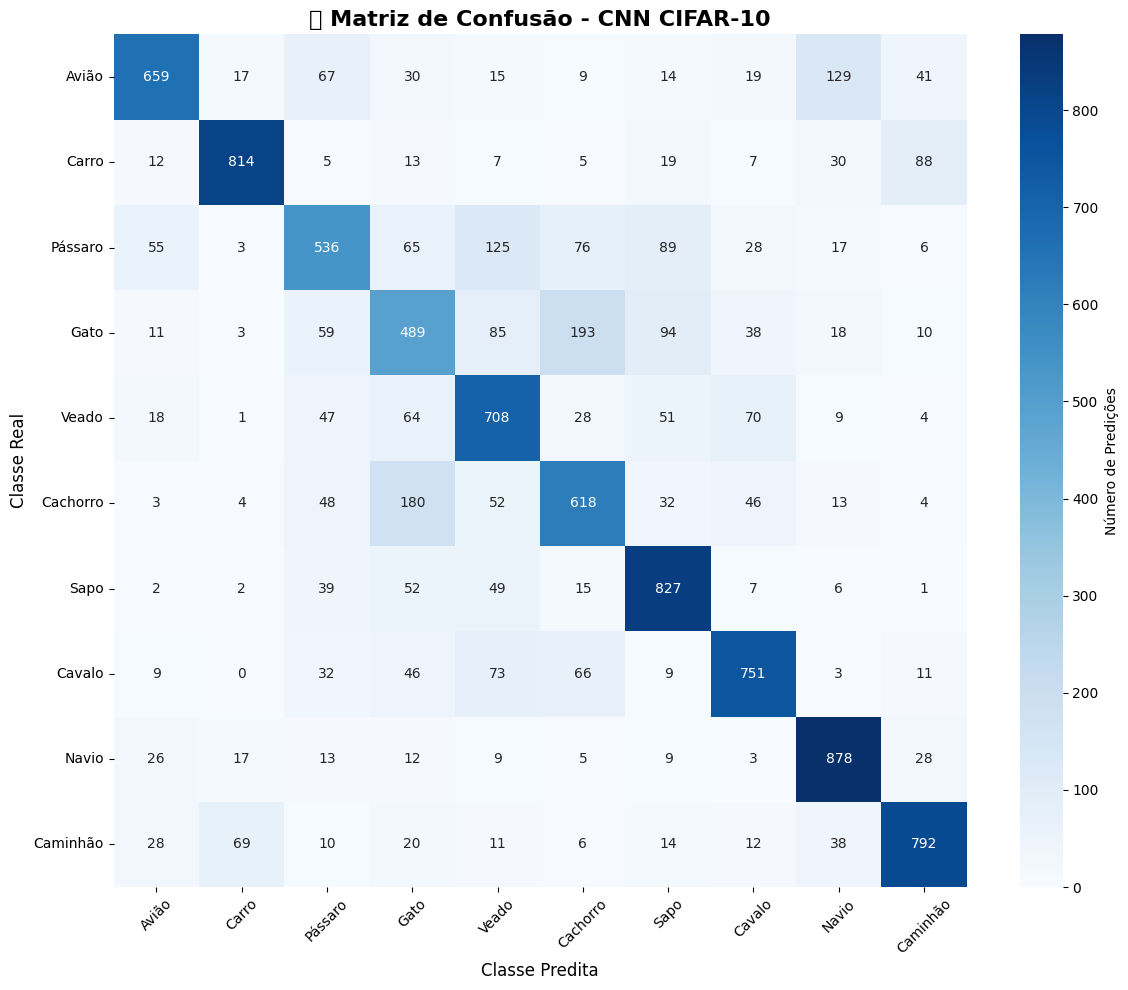


📋 Relatório Detalhado de Classificação:
------------------------------------------------------------
              precision    recall  f1-score   support

       Avião       0.80      0.66      0.72      1000
       Carro       0.88      0.81      0.84      1000
     Pássaro       0.63      0.54      0.58      1000
        Gato       0.50      0.49      0.50      1000
       Veado       0.62      0.71      0.66      1000
    Cachorro       0.61      0.62      0.61      1000
        Sapo       0.71      0.83      0.77      1000
      Cavalo       0.77      0.75      0.76      1000
       Navio       0.77      0.88      0.82      1000
    Caminhão       0.80      0.79      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000


🔮 Visualizando predições...


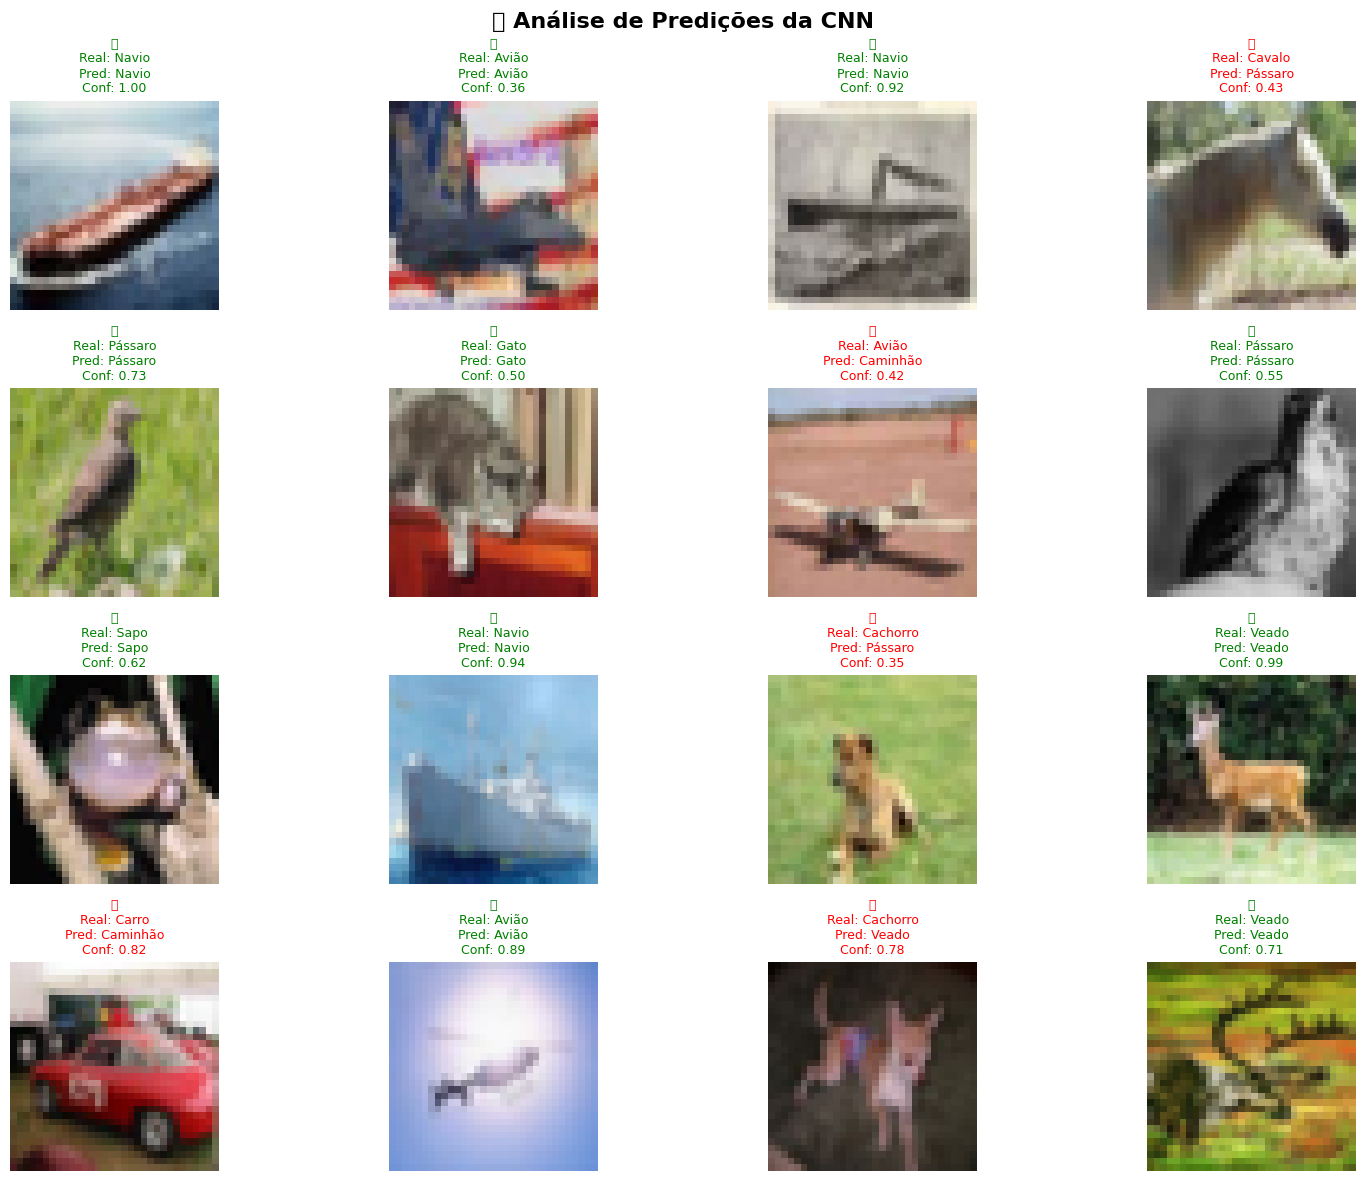


❌ Análise de Erros:
   Total de erros: 2928
   Taxa de erro: 29.28%


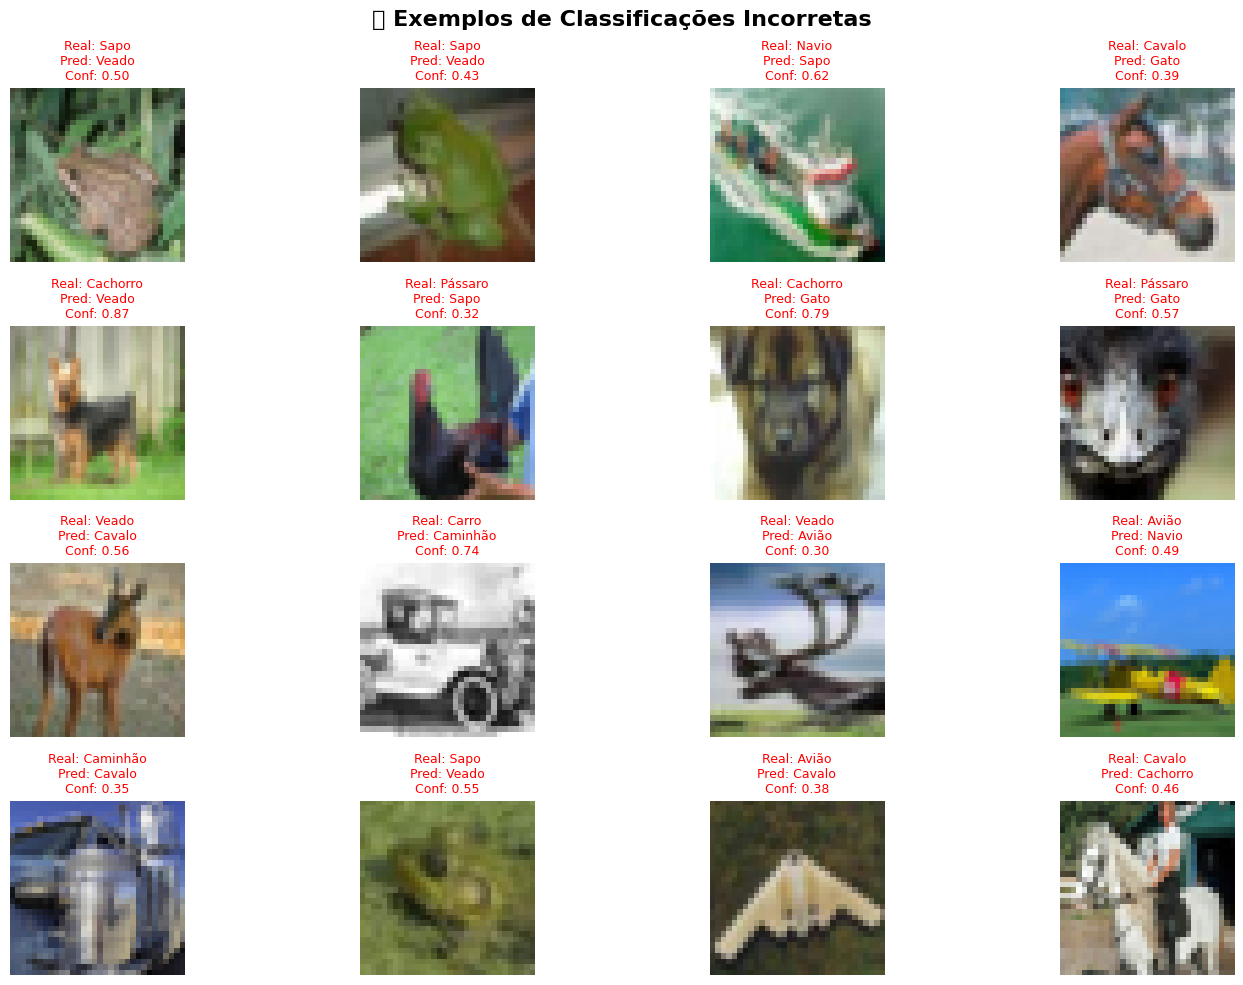


🎉 ANÁLISE COMPLETA FINALIZADA!
🎯 CNN treinada com sucesso no dataset CIFAR-10
📊 Acurácia final: 70.72%


In [2]:
# ============================================================================
# CLASSIFICAÇÃO DE IMAGENS COM CNN - DATASET CIFAR-10
# Código didático para apresentação acadêmica
# ============================================================================

# 1. IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS
# ============================================================================
import numpy as np                      # Operações matemáticas e arrays
import matplotlib.pyplot as plt         # Visualização de dados
import tensorflow as tf                 # Framework de Deep Learning
from tensorflow.keras import datasets, layers, models  # Componentes do Keras
from sklearn.metrics import classification_report, confusion_matrix  # Métricas
import seaborn as sns                   # Visualizações estatísticas
import warnings
warnings.filterwarnings('ignore')       # Suprimir avisos desnecessários

print("🚀 Iniciando projeto de Classificação de Imagens com CNN")
print("📊 Dataset: CIFAR-10")
print("-" * 50)

# 2. CARREGAMENTO E PRÉ-PROCESSAMENTO DOS DADOS
# ============================================================================
print("📥 Carregando dataset CIFAR-10...")

# Carregar dados (automaticamente baixa se não estiver presente)
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print(f"✅ Dados carregados com sucesso!")
print(f"   📏 Treino: {x_train.shape[0]} imagens")
print(f"   📏 Teste: {x_test.shape[0]} imagens")
print(f"   🖼️  Dimensão das imagens: {x_train.shape[1]}x{x_train.shape[2]}x{x_train.shape[3]}")

# NORMALIZAÇÃO: Converter pixels de [0,255] para [0,1]
# Isso melhora a convergência do treinamento
print("\n🔄 Normalizando pixels...")
x_train_original = x_train.copy()  # Guardar original para visualização
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print("✅ Normalização concluída!")

# 3. DEFINIÇÃO DAS CLASSES
# ============================================================================
class_names = [
    'Avião', 'Carro', 'Pássaro', 'Gato', 'Veado',
    'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão'
]

print(f"\n🏷️  Classes do dataset: {len(class_names)} categorias")
for i, nome in enumerate(class_names):
    print(f"   {i}: {nome}")

# 4. EXPLORAÇÃO VISUAL DOS DADOS
# ============================================================================
print("\n🔍 Visualizando amostras do dataset...")

def visualizar_amostras():
    """Função para visualizar amostras aleatórias do dataset"""
    plt.figure(figsize=(12, 8))
    plt.suptitle("🖼️ Amostras do Dataset CIFAR-10", fontsize=16, fontweight='bold')

    for i in range(20):  # Mostrar mais amostras
        plt.subplot(4, 5, i+1)
        idx = np.random.randint(len(x_train_original))
        plt.imshow(x_train_original[idx])
        plt.title(f"{class_names[int(y_train[idx])]}", fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

visualizar_amostras()

# 5. ANÁLISE DA DISTRIBUIÇÃO DAS CLASSES
# ============================================================================
print("\n📊 Analisando distribuição das classes...")

def analisar_distribuicao():
    """Análise da distribuição das classes no dataset"""
    unique, counts = np.unique(y_train, return_counts=True)

    plt.figure(figsize=(12, 6))

    # Gráfico de barras
    plt.subplot(1, 2, 1)
    bars = plt.bar([class_names[i] for i in unique], counts, color='skyblue', alpha=0.7)
    plt.title('📊 Distribuição das Classes - Conjunto de Treino')
    plt.ylabel('Número de Imagens')
    plt.xticks(rotation=45)

    # Adicionar valores nas barras
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                str(count), ha='center', va='bottom')

    # Gráfico de pizza
    plt.subplot(1, 2, 2)
    plt.pie(counts, labels=[class_names[i] for i in unique], autopct='%1.1f%%')
    plt.title('🥧 Proporção das Classes')

    plt.tight_layout()
    plt.show()

    print(f"✅ Dataset balanceado: {counts[0]} imagens por classe")

analisar_distribuicao()

# 6. CONSTRUÇÃO DA ARQUITETURA CNN
# ============================================================================
print("\n🏗️  Construindo a arquitetura da CNN...")

def criar_modelo():
    """
    Cria e retorna o modelo CNN com arquitetura explicada

    Arquitetura:
    - 3 Blocos Convolucionais (Conv2D + MaxPooling)
    - Camada de Flatten
    - 2 Camadas Densas (Fully Connected)
    """

    modelo = models.Sequential()

    # BLOCO CONVOLUCIONAL 1
    print("   🔵 Bloco 1: Conv2D(32) + MaxPooling")
    modelo.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(32, 32, 3), name='conv2d_1'))
    modelo.add(layers.MaxPooling2D((2, 2), name='maxpool_1'))

    # BLOCO CONVOLUCIONAL 2
    print("   🔵 Bloco 2: Conv2D(64) + MaxPooling")
    modelo.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_2'))
    modelo.add(layers.MaxPooling2D((2, 2), name='maxpool_2'))

    # BLOCO CONVOLUCIONAL 3
    print("   🔵 Bloco 3: Conv2D(64)")
    modelo.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_3'))

    # CAMADAS DENSAS
    print("   🟡 Flatten + Dense Layers")
    modelo.add(layers.Flatten(name='flatten'))
    modelo.add(layers.Dropout(0.5, name='dropout'))  # Regularização
    modelo.add(layers.Dense(64, activation='relu', name='dense_1'))
    modelo.add(layers.Dense(10, activation='softmax', name='output'))

    return modelo

# Criar o modelo
model = criar_modelo()

# Visualizar arquitetura
print("\n📋 Resumo da Arquitetura:")
model.summary()

# 7. COMPILAÇÃO DO MODELO
# ============================================================================
print("\n⚙️  Compilando o modelo...")

model.compile(
    optimizer='adam',                    # Otimizador Adam
    loss='sparse_categorical_crossentropy',  # Função de perda
    metrics=['accuracy']                 # Métrica de avaliação
)

print("✅ Modelo compilado com sucesso!")
print("   🎯 Otimizador: Adam")
print("   📉 Função de Perda: Sparse Categorical Crossentropy")
print("   📊 Métrica: Accuracy")

# 8. TREINAMENTO DO MODELO
# ============================================================================
print("\n🏋️  Iniciando treinamento...")

# Callback para acompanhar o progresso
class ProgressCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"   Época {epoch+1}/10 - "
              f"Acurácia: {logs['accuracy']:.4f} - "
              f"Perda: {logs['loss']:.4f} - "
              f"Val_Acc: {logs['val_accuracy']:.4f}")

# Treinar o modelo
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[ProgressCallback()],
    verbose=0  # Suprimir output padrão para usar nosso callback
)

print("✅ Treinamento concluído!")

# 9. VISUALIZAÇÃO DO TREINAMENTO
# ============================================================================
def plotar_historico(history):
    """Visualiza o histórico de treinamento"""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Acurácia
    ax1.plot(history.history['accuracy'], 'b-', label='Treino', linewidth=2)
    ax1.plot(history.history['val_accuracy'], 'r-', label='Validação', linewidth=2)
    ax1.set_title('📈 Evolução da Acurácia', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Épocas')
    ax1.set_ylabel('Acurácia')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Perda
    ax2.plot(history.history['loss'], 'b-', label='Treino', linewidth=2)
    ax2.plot(history.history['val_loss'], 'r-', label='Validação', linewidth=2)
    ax2.set_title('📉 Evolução da Perda', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Épocas')
    ax2.set_ylabel('Perda')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

print("\n📊 Visualizando histórico de treinamento...")
plotar_historico(history)

# 10. AVALIAÇÃO DO MODELO
# ============================================================================
print("\n🎯 Avaliando performance no conjunto de teste...")

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"📊 RESULTADOS FINAIS:")
print(f"   🎯 Acurácia no Teste: {test_acc*100:.2f}%")
print(f"   📉 Perda no Teste: {test_loss:.4f}")

# 11. MATRIZ DE CONFUSÃO
# ============================================================================
print("\n🔍 Gerando matriz de confusão...")

# Fazer predições
y_pred = model.predict(x_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plotar matriz de confusão
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test.flatten(), y_pred_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Número de Predições'})

plt.title('🎯 Matriz de Confusão - CNN CIFAR-10', fontsize=16, fontweight='bold')
plt.xlabel('Classe Predita', fontsize=12)
plt.ylabel('Classe Real', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Relatório de classificação
print("\n📋 Relatório Detalhado de Classificação:")
print("-" * 60)
report = classification_report(y_test.flatten(), y_pred_classes,
                             target_names=class_names)
print(report)

# 12. VISUALIZAÇÃO DE PREDIÇÕES
# ============================================================================
def visualizar_predicoes(num_amostras=16):
    """Visualiza predições com confiança"""

    plt.figure(figsize=(16, 12))
    plt.suptitle('🔮 Análise de Predições da CNN', fontsize=16, fontweight='bold')

    for i in range(num_amostras):
        # Selecionar amostra aleatória
        idx = np.random.randint(len(x_test))

        # Fazer predição
        pred_probs = model.predict(x_test[idx:idx+1], verbose=0)[0]
        pred_class = np.argmax(pred_probs)
        pred_confidence = pred_probs[pred_class]

        true_class = int(y_test[idx])

        # Plotar
        plt.subplot(4, 4, i+1)
        plt.imshow(x_test[idx])

        # Determinar cor baseada na correção
        color = 'green' if pred_class == true_class else 'red'
        status = '✅' if pred_class == true_class else '❌'

        plt.title(f'{status}\nReal: {class_names[true_class]}\n'
                 f'Pred: {class_names[pred_class]}\n'
                 f'Conf: {pred_confidence:.2f}',
                 color=color, fontsize=9)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

print("\n🔮 Visualizando predições...")
visualizar_predicoes()

# 13. ANÁLISE DE ERROS
# ============================================================================
def analisar_erros():
    """Analisa os tipos de erros mais comuns"""

    # Encontrar predições incorretas
    incorrect_idx = np.where(y_pred_classes != y_test.flatten())[0]

    print(f"\n❌ Análise de Erros:")
    print(f"   Total de erros: {len(incorrect_idx)}")
    print(f"   Taxa de erro: {len(incorrect_idx)/len(y_test)*100:.2f}%")

    # Mostrar alguns exemplos de erros
    plt.figure(figsize=(15, 10))
    plt.suptitle('❌ Exemplos de Classificações Incorretas', fontsize=16, fontweight='bold')

    for i in range(min(16, len(incorrect_idx))):
        idx = incorrect_idx[i]

        plt.subplot(4, 4, i+1)
        plt.imshow(x_test[idx])

        true_class = int(y_test[idx])
        pred_class = y_pred_classes[idx]
        confidence = y_pred[idx][pred_class]

        plt.title(f'Real: {class_names[true_class]}\n'
                 f'Pred: {class_names[pred_class]}\n'
                 f'Conf: {confidence:.2f}',
                 fontsize=9, color='red')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

analisar_erros()

print("\n" + "="*60)
print("🎉 ANÁLISE COMPLETA FINALIZADA!")
print("🎯 CNN treinada com sucesso no dataset CIFAR-10")
print(f"📊 Acurácia final: {test_acc*100:.2f}%")
print("="*60)